In [2]:
import ROOT as r 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Welcome to JupyROOT 6.24/02


In [3]:
directory= "/Users/adit/Google Drive/Internship_ Research/Muon g-2/Data Filed/combined_forAdit_timealigned.root"
f = r.TFile(directory)

In [4]:
f.cd('LaserEvents')
t = f.Get('LaserEvents/tree')
df = pd.DataFrame(r.RDataFrame(t).AsNumpy())

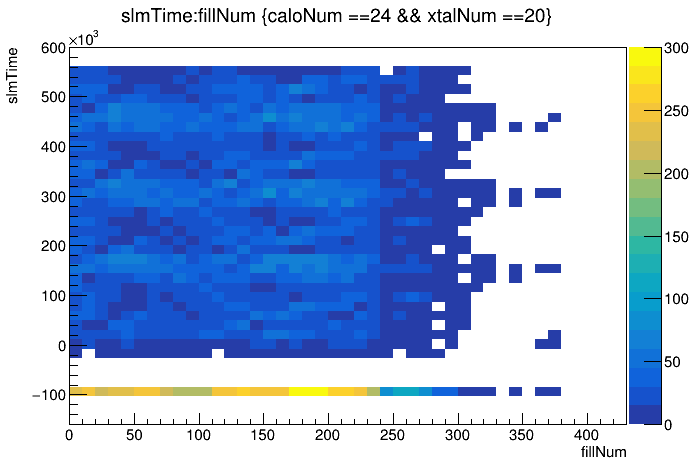

In [213]:
c= r.TCanvas()
t.Draw('slmTime:fillNum', "caloNum =={} && xtalNum =={}".format(calo,xtal), 'colz')
c.Draw()

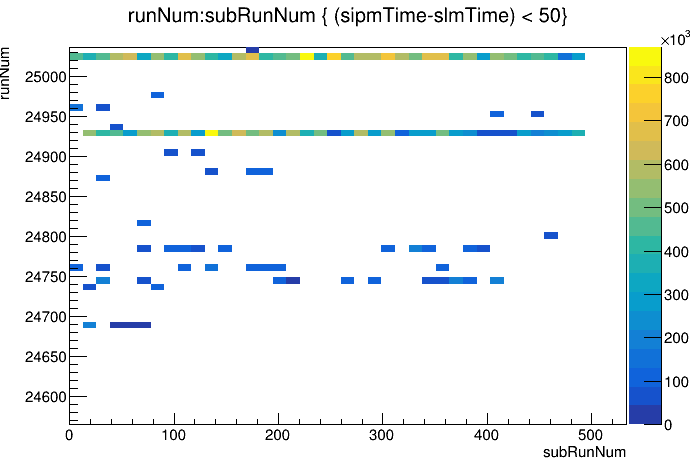

In [36]:
c2 = r.TCanvas()
t.Draw('runNum:subRunNum',' (sipmTime-slmTime) < 50','colz')
c2.Draw()

Error in <THistPainter::PaintInit>: log scale requested with a negative argument (-1.000000)
Error in <THistPainter::PaintInit>: log scale requested with a negative argument (-1.000000)
Error in <THistPainter::PaintInit>: log scale requested with a negative argument (-1.000000)


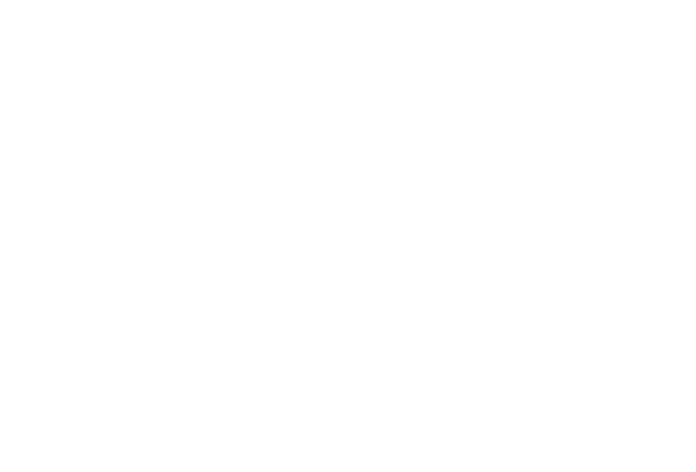

In [199]:
t.Draw('caloNum:xtalNum', "runNum == 25026 && subRunNum==2 && fillNum == 178", 'colz')
c.Draw()

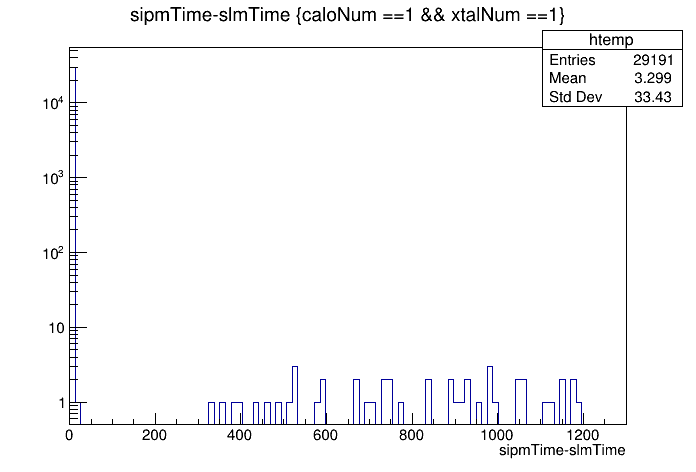

In [9]:
t.Draw('sipmTime-slmTime', "caloNum ==1 && xtalNum ==1")
c.SetLogy()
c.Draw()

In [6]:
print(df.describe())
print(df.nunique())
print(df.head())

       gpsTimeStamp  cccTimeStamp        runNum     subRunNum       fillNum  \
count  3.779552e+07  3.779552e+07  3.779552e+07  3.779552e+07  3.779552e+07   
mean   1.555790e+09  9.911910e+10  2.496101e+04  2.245266e+02  1.342963e+02   
std    2.544310e+05  5.867342e+10  8.201021e+01  1.350690e+02  7.734417e+01   
min    1.554982e+09  2.163583e+08  2.468500e+04  0.000000e+00  1.000000e+00   
25%    1.555664e+09  4.969637e+10  2.492800e+04  1.090000e+02  6.600000e+01   
50%    1.556000e+09  9.647675e+10  2.502600e+04  2.150000e+02  1.370000e+02   
75%    1.556003e+09  1.477690e+11  2.502600e+04  3.380000e+02  1.960000e+02   
max    1.556034e+09  2.220666e+11  2.503200e+04  4.930000e+02  3.770000e+02   

           bunchNum    fillType       caloNum       xtalNum      sipmTime  \
count  3.779552e+07  37795516.0  3.779552e+07  3.779552e+07  3.779552e+07   
mean   7.500986e+00         1.0  1.249642e+01  2.651775e+01  1.989889e+05   
std    4.609085e+00         0.0  6.923995e+00  1.557810e+

In [5]:
df_filtered = df.loc[(df['sipmTime']-df['slmTime']) < 50]

In [6]:
df_noise = df.loc[(df['sipmTime']-df['slmTime']) > 50]
#evaluated this in a diff notebook, nothing significant, no commonalities, only 47 of 29k entries

In [28]:
pd.unique(df_filtered[df_filtered['runNum'] == 24928]['subRunNum'])

array([412,  74, 443,  13, 218, 190, 493, 136,  29, 340, 439, 466,  88,
       164, 301, 144, 293, 437, 484,  78, 193,  34,  52,  67, 142, 124,
       174, 387, 116, 284, 165, 298, 378, 430,  20, 156, 364,  38,  40,
       423, 272,  69, 453, 460,  47, 459, 485, 209,  86, 223, 282, 109,
       192, 322, 143, 145, 324, 204, 487, 101, 150, 108, 475, 135, 347,
       356,  96, 180, 242, 478,  70, 181, 158, 360,  16,  60, 161, 335,
        77, 140, 159, 241, 112, 154, 299, 307, 394, 137,  41, 131, 177,
        19, 230, 363, 176, 302,  91,  61, 139,  79, 243,  85, 220, 305,
       199, 354, 246, 191, 118, 370, 208, 172, 342, 198, 388, 479,  28,
        56, 134, 186, 178, 334, 306, 281,  72, 268,  44, 261,  23,  25,
       274, 285, 327, 110, 211, 310, 196, 296, 221,  50,  82, 313, 133,
       217, 278, 339,  94, 182, 232, 279, 130, 245, 128, 366, 189, 239,
       107, 119, 332, 210, 353, 258, 149, 167], dtype=int32)

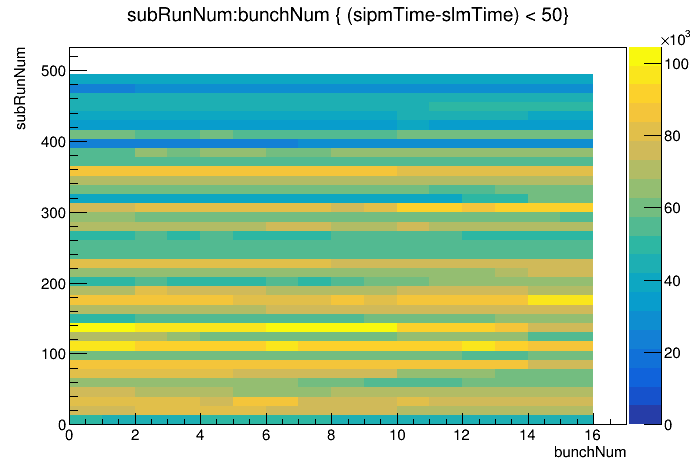

In [42]:
t.Draw('subRunNum:bunchNum',' (sipmTime-slmTime) < 50','colz')
c2.Draw()
#interesitng property, number of data points is consistent across a subRun i.e. no cuts within a bunch

In [ ]:
#fullRunPulse = df_xtal[(df_xtal['runNum']== 24928)]
#avgSyncPulse = fullRunPulse[fullRunPulse['slmTime']<-10000].groupby('fillNum').count()

In [214]:
calo = 11
xtal =20

df_xtal = df_filtered[(df_filtered['caloNum']==calo)& (df_filtered['xtalNum']==xtal)]
syncPulse = df_xtal.groupby(['runNum','subRunNum','fillNum']).min()
syncPulse.rename({'slmEnergy': 'syncEnergy'}, axis = 'columns',inplace=True )
df_xtal  = pd.merge(df_xtal,syncPulse['syncEnergy'], how = 'inner', on = ['runNum','subRunNum','fillNum'])
df_xtal['normalSlmEnergy'] = (df_xtal['slmEnergy']/df_xtal['syncEnergy'])

In [215]:
df_xtal[df_xtal['runNum']==24928].groupby(['subRunNum','fillNum']).apply(func1)

,gpsTimeStamp,cccTimeStamp,runNum,subRunNum,fillNum,bunchNum,fillType,caloNum,xtalNum,sipmTime,...,lmPmtArea1,lmPmtArea2,lmPmtTime1,lmPmtTime2,slmTime,slmEnergy,slmPedestal,slmChi2,syncEnergy,normalSlmEnergy
0,1.555667e+09,1.880835e+11,24928,412,178,0,1,11,20,-99403.755620,...,18069.0,13022.0,5291.0,5480.0,-99406.160620,3019.662241,-1796.873819,15.599163,2940.564648,1.026899
1,1.555667e+09,1.880835e+11,24928,412,178,0,1,11,20,123910.175381,...,18440.0,13706.0,228606.0,228794.0,123907.683327,3137.851834,-1797.306793,11.164898,2940.564648,1.067092
2,1.555667e+09,1.880835e+11,24928,412,178,0,1,11,20,271914.215100,...,17968.0,13106.0,376610.0,376799.0,271911.762742,2986.663749,-1796.460145,12.432201,2940.564648,1.015677
3,1.555667e+09,1.880835e+11,24928,412,178,0,1,11,20,419910.069792,...,17712.0,13438.0,524605.0,524795.0,419907.574136,2940.564648,-1794.774182,10.302693,2940.564648,1.000000
4,1.555667e+09,1.880839e+11,24928,412,180,1,1,11,20,-99384.970391,...,18205.0,12762.0,5310.0,5499.0,-99387.375391,3192.076990,-1796.424798,10.759128,3024.692135,1.055339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28959,1.555665e+09,7.925981e+10,24928,167,298,15,1,11,20,-99417.595000,...,18039.0,13070.0,5305.0,5494.0,-99420.000000,3042.551033,-1796.381237,11.513638,2982.735379,1.020054
28960,1.555665e+09,7.925981e+10,24928,167,298,15,1,11,20,9899.440441,...,18206.0,13164.0,114621.0,114811.0,9897.011953,3011.870254,-1797.633974,11.113565,2982.735379,1.009768
28961,1.555665e+09,7.925981e+10,24928,167,298,15,1,11,20,157903.499488,...,18092.0,12307.0,262626.0,262816.0,157901.113141,2982.735379,-1796.422834,9.442500,2982.735379,1.000000
28962,1.555665e+09,7.925981e+10,24928,167,298,15,1,11,20,305899.374417,...,18350.0,12642.0,410622.0,410811.0,305896.975769,3266.339199,-1797.527360,11.257938,2982.735379,1.095082


Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_0 (Potential memory leak).


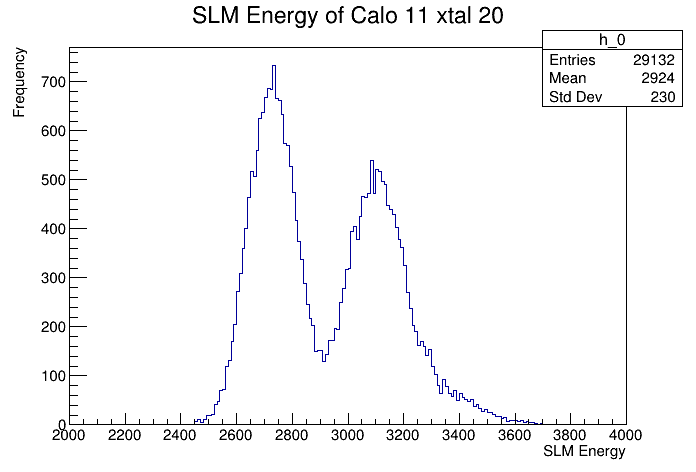

In [216]:
h0 = r.TH1D(f"h_{0}", "SLM Energy of Calo {} xtal {}; SLM Energy; Frequency".format(calo,xtal), 200, 2000, 4000)

for x in df_xtal['slmEnergy']:
    h0.Fill(x)

h0.Draw()
c.Draw()


Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).


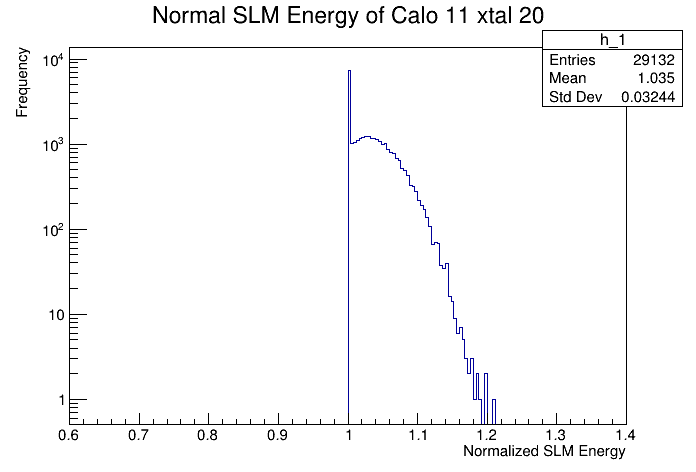

In [217]:
c.SetLogy()

h1 = r.TH1D(f"h_{1}", "Normal SLM Energy of Calo {} xtal {}; Normalized SLM Energy; Frequency".format(calo,xtal), 200, 0.6, 1.4)

for x in df_xtal['normalSlmEnergy']:
    h1.Fill(x)

h1.Draw()
c.Draw()


Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).


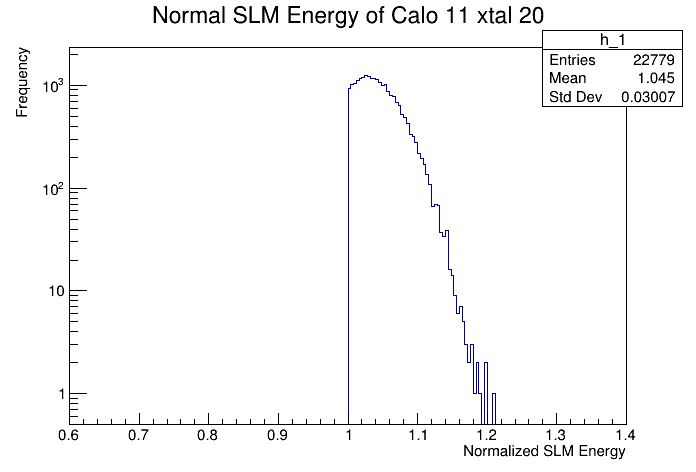

In [218]:
#looking at non sync pulses to see if they are major contributor

h1 = r.TH1D(f"h_{1}", "Normal SLM Energy of Calo {} xtal {}; Normalized SLM Energy; Frequency".format(calo,xtal), 200, 0.6, 1.4)

for x in df_xtal[df_xtal['normalSlmEnergy']!=1]['normalSlmEnergy']:
    h1.Fill(x)

h1.Draw()
c.Draw()

# still the curve in one- sided Gaussian, definitely tells us other -n- fill pulses are more energetic than sync Pulse

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_15 (Potential memory leak).
Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_1 (Potential memory leak).


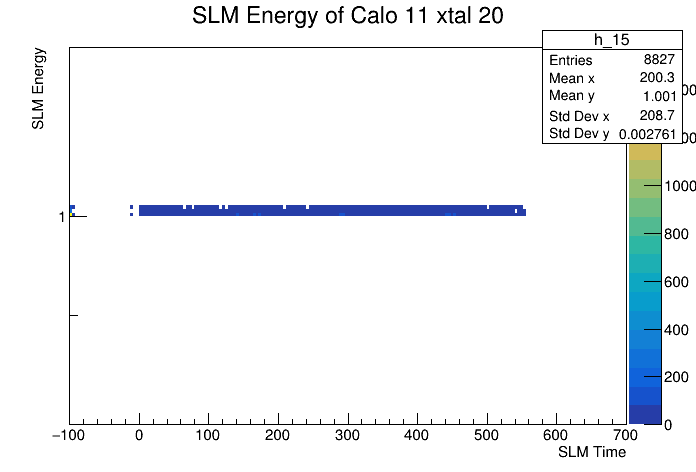

In [219]:
h15 = r.TH2D(f"h_{15}", "SLM Energy of Calo {} xtal {};SLM Time; SLM Energy".format(calo,xtal), 200, -100, 700, 100, 0.8, 1.2)

for (x,y) in zip(df_xtal[df_xtal['normalSlmEnergy']<1.01]['slmTime'],df_xtal[df_xtal['normalSlmEnergy']<1.01]['normalSlmEnergy']):
    h15.Fill(x/1000,y)

h15.Draw('colz')
c.Draw()

h1 = r.TH1D(f"h_{1}", "SLM Energy of Calo {} xtal {}; Normalized SLM Energy; Frequency".format(calo,xtal), 200, 0.6, 1.4)

#examing their time dependence foesn't give any cocrete 

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_2 (Potential memory leak).


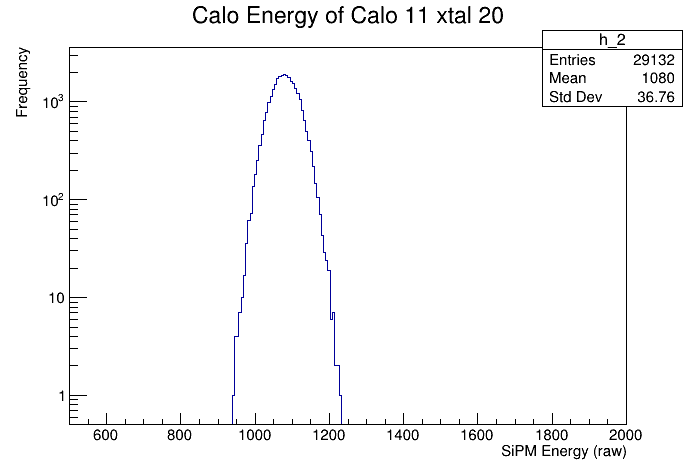

In [220]:
h2 = r.TH1D(f"h_{2}", "Calo Energy of Calo {} xtal {}; SiPM Energy (raw); Frequency".format(calo,xtal), 250, 500, 2000)

for x in df_xtal['sipmEnergy']:
    h2.Fill(x)

h2.Draw()
c.Draw()



Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_3 (Potential memory leak).


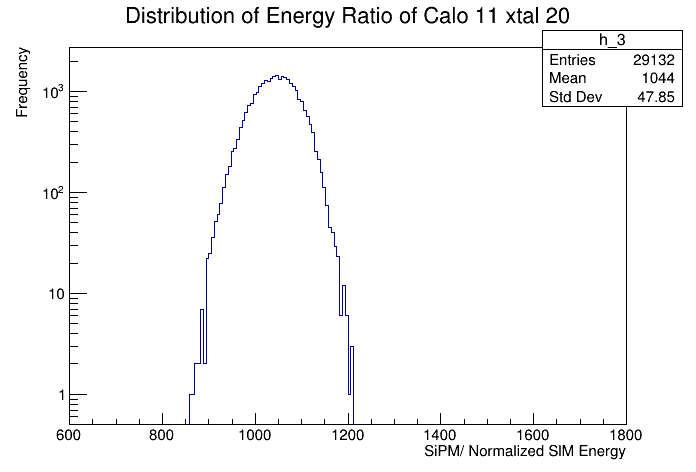

In [221]:
h3 = r.TH1D(f"h_{3}", "Distribution of Energy Ratio of Calo {} xtal {}; SiPM/ Normalized SlM Energy; Frequency".format(calo,xtal), 200, 600, 1800)

for x in df_xtal['sipmEnergy']/df_xtal['normalSlmEnergy']:
    h3.Fill(x)

h3.Draw()
c.Draw()

mean_temp = h3.GetMean()


Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_4 (Potential memory leak).


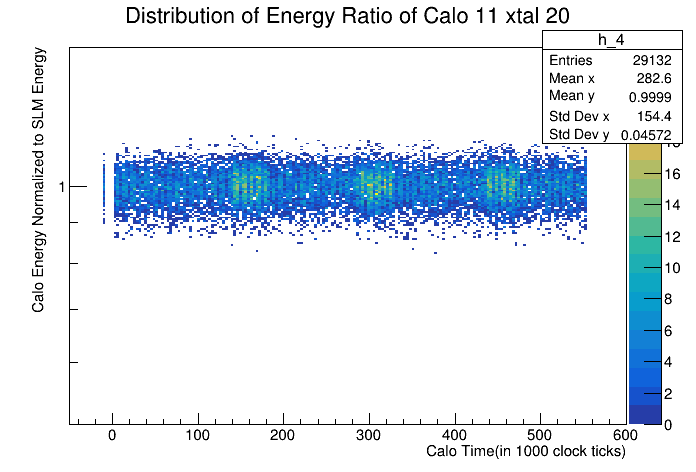

In [222]:
h4 = r.TH2D(f"h_{4}", "Distribution of Energy Ratio of Calo {} xtal {}; Calo Time(in 1000 clock ticks); Calo Energy Normalized to SLM Energy".format(calo,xtal),
            200, -50, 600,
            200,0.5,1.5)

for (x,y) in zip(df_xtal['sipmTime'], df_xtal['sipmEnergy']/df_xtal['normalSlmEnergy']/mean_temp):
    h4.Fill(x/1000,y)

h4.Draw('colz')
c.Draw()



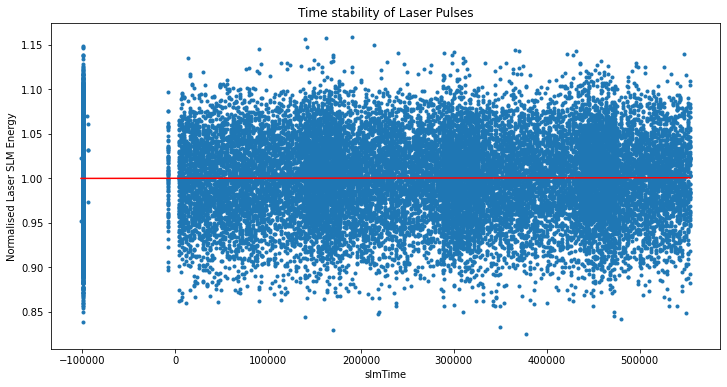

In [223]:
fig,ax = plt.subplots()
ax.plot(df_xtal['sipmTime'], df_xtal['sipmEnergy']/df_xtal['normalSlmEnergy']/mean_temp,".")
ax.set_title("Time stability of Laser Pulses")
ax.set_xlabel("slmTime")
ax.set_ylabel("Normalised Laser SLM Energy")
# fit a curve (linear for now) through the stability of time 


def func(x,m,b):
    return m*x + b 

initial_guess = [1.2, 0.03]
pars, pcov = curve_fit(func, df_xtal['sipmTime'], df_xtal['sipmEnergy']/df_xtal['normalSlmEnergy']/mean_temp, p0=initial_guess)
xfit = np.linspace(np.amin(df_xtal['sipmTime']),np.amax(df_xtal['sipmTime']))
yfit = func(xfit, pars[0], pars[1])
plt.plot(xfit,yfit,'r-',label=f"Linear Fit\nm={pars[0]:.2f}\nb={pars[1]:.2f}")

timeGrowth = pars[0]
timeStd = np.sqrt(pcov.trace())

ValueError: `ydata` must not be empty!

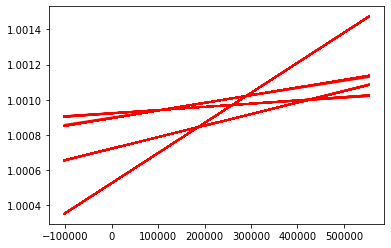

In [117]:
timeGrowth = np.zeros((24,54))
timeStd = np.zeros((24,54))

for calo in pd.unique(df['caloNum']):
    for xtal in  pd.unique(df['xtalNum']):

        df_xtal = df_filtered[(df_filtered['caloNum']==calo)& (df_filtered['xtalNum']==xtal)]
        syncPulse = df_xtal.groupby(['runNum','subRunNum','fillNum']).min()
        syncPulse.rename({'slmEnergy': 'syncEnergy'}, axis = 'columns',inplace=True )
        df_xtal  = pd.merge(df_xtal,syncPulse['syncEnergy'], how = 'inner', on = ['runNum','subRunNum','fillNum'])
        df_xtal['normalSlmEnergy'] = (df_xtal['slmEnergy']/df_xtal['syncEnergy'])
        
        mean = df_xtal['sipmEnergy']/df_xtal['normalSlmEnergy'].mean()
        
        def func(x,m,b):
            return m*x + b 

        initial_guess = [1.2, 0.03]
        pars, pcov = curve_fit(func, df_xtal['sipmTime'], df_xtal['sipmEnergy']/df_xtal['normalSlmEnergy']/mean, p0=initial_guess)

        timeGrowth[calo-1][xtal] = pars[0]
        timeStd[calo-1][xtal] = np.sqrt(pcov[1,1])

/var/folders/bg/h849yg0s2771n7mypkp93k680000gn/T/ipykernel_19622/2034599665.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(timeGrowth[calo-1].reshape(6,9), cmap=plt.cm.Blues)


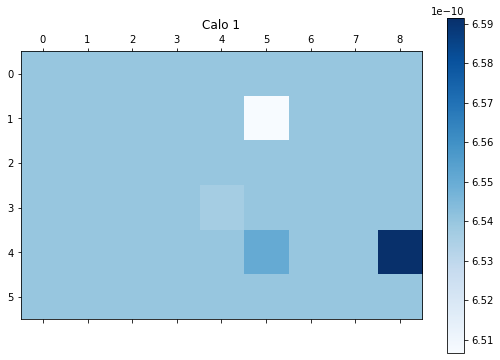

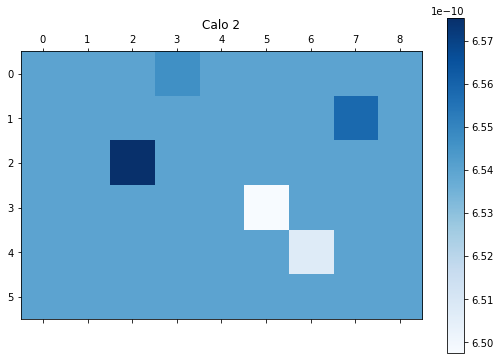

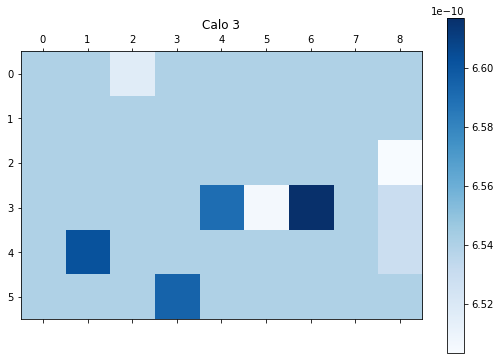

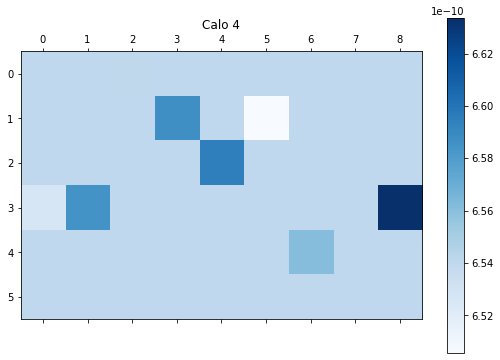

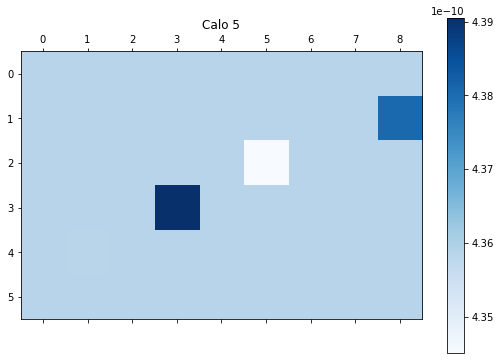

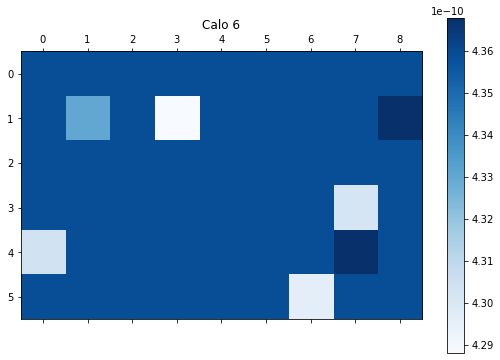

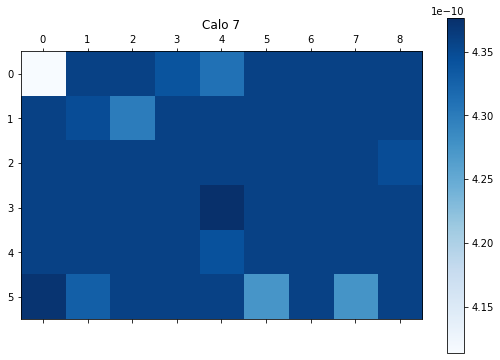

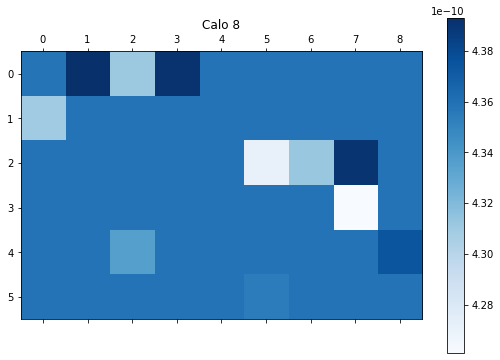

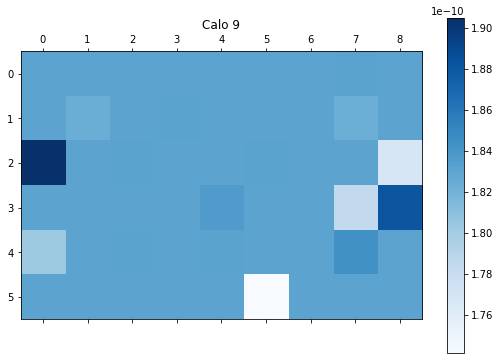

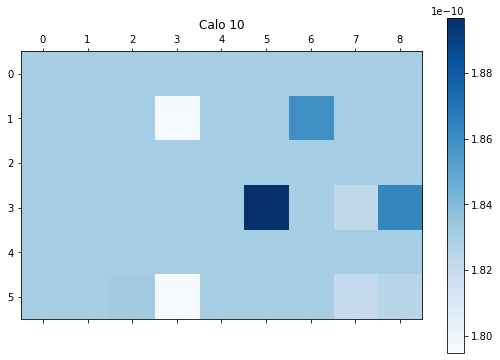

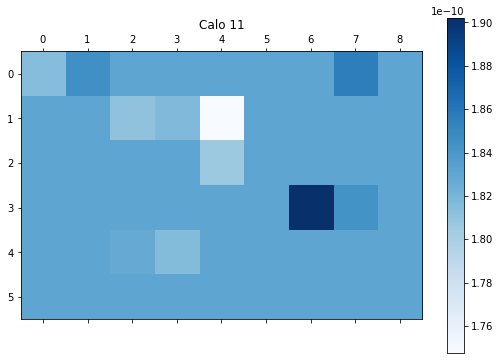

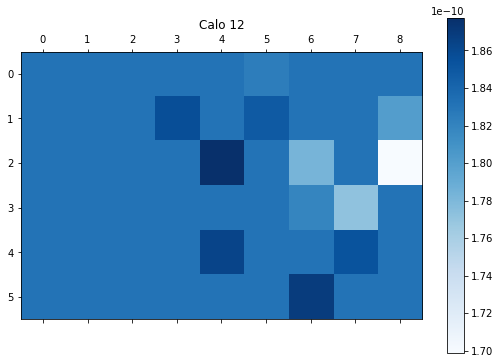

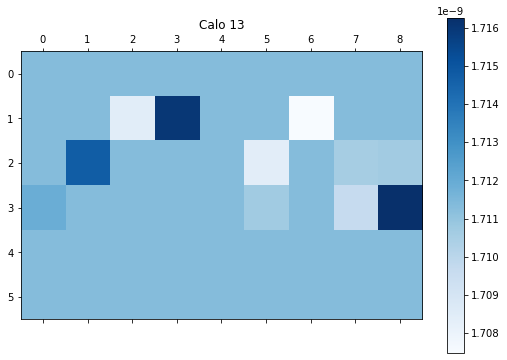

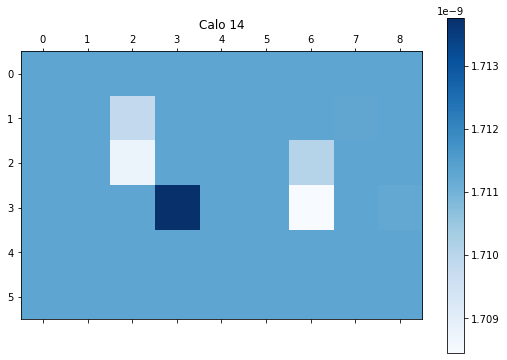

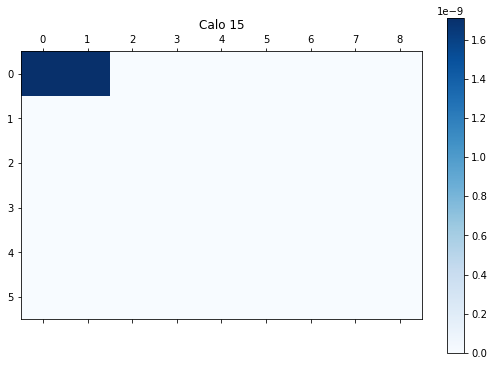

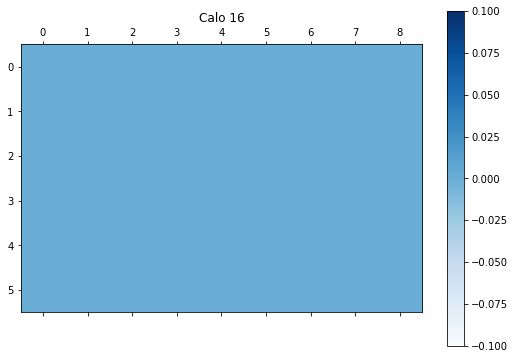

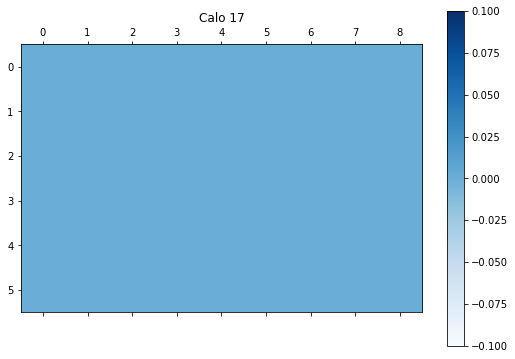

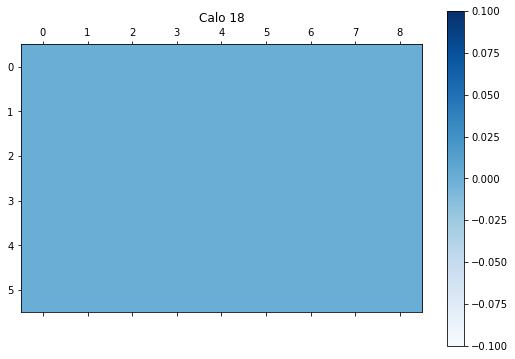

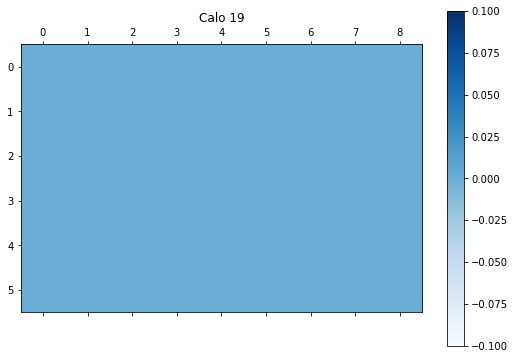

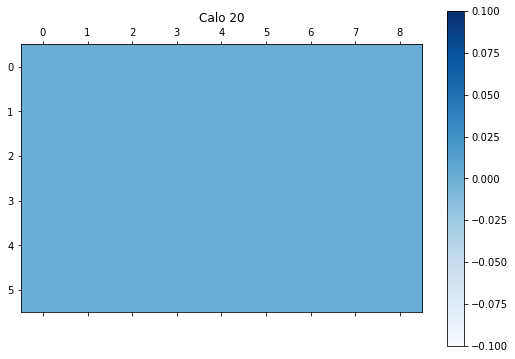

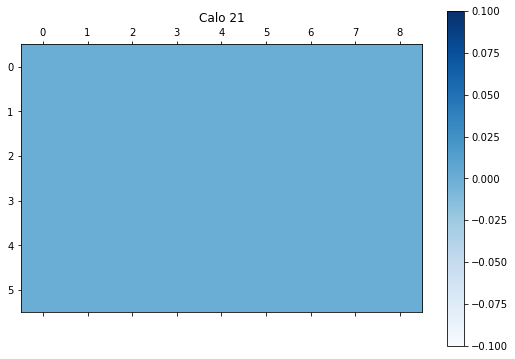

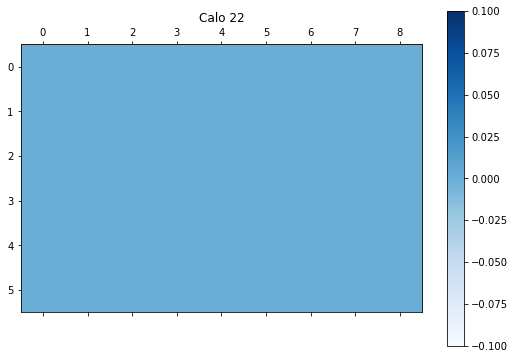

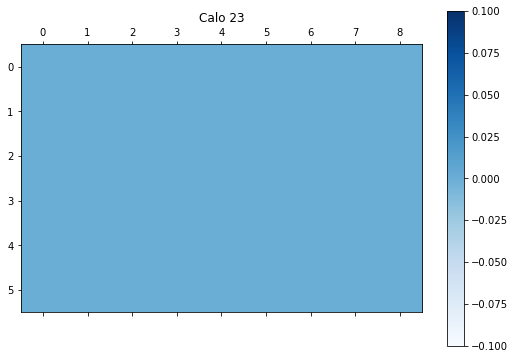

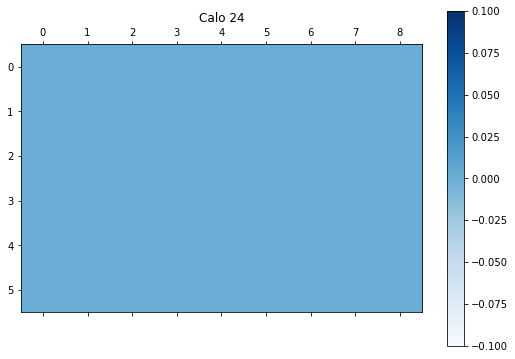

In [211]:
plt.rcParams["figure.figsize"] = (12,6) 


for calo in pd.unique(df['caloNum']):
    plt.matshow(timeGrowth[calo-1].reshape(6,9), cmap=plt.cm.Blues)
    plt.title('Calo {}'.format(calo))
    plt.colorbar()



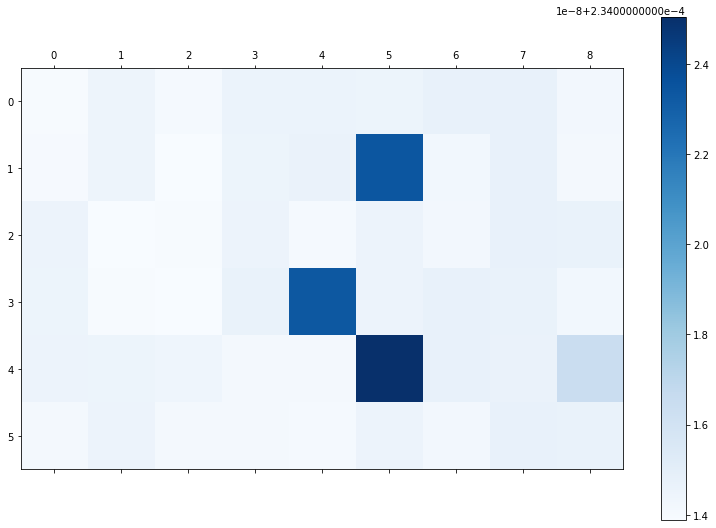

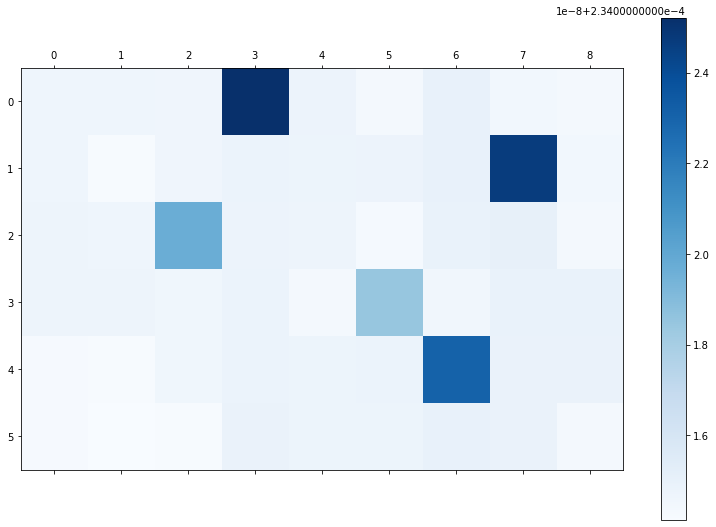

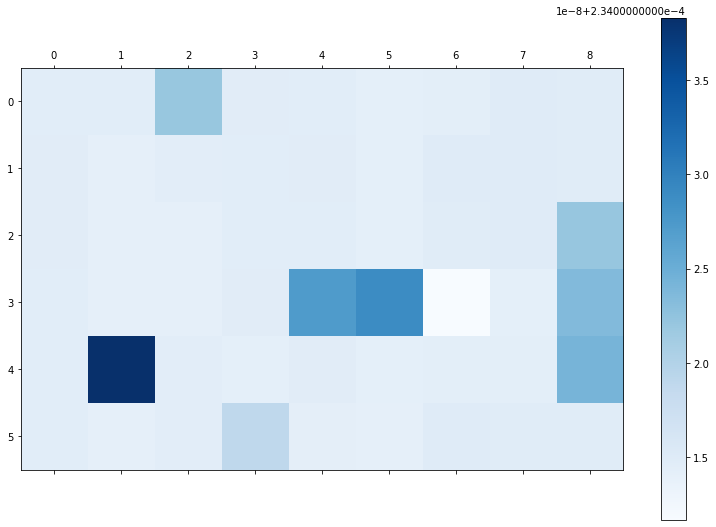

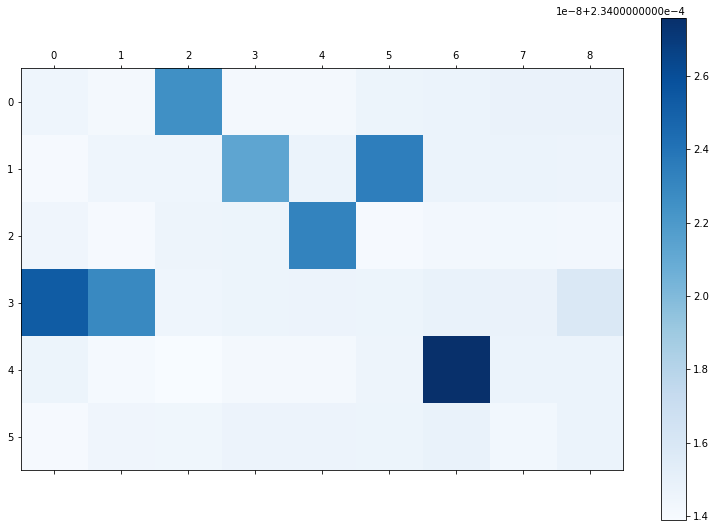

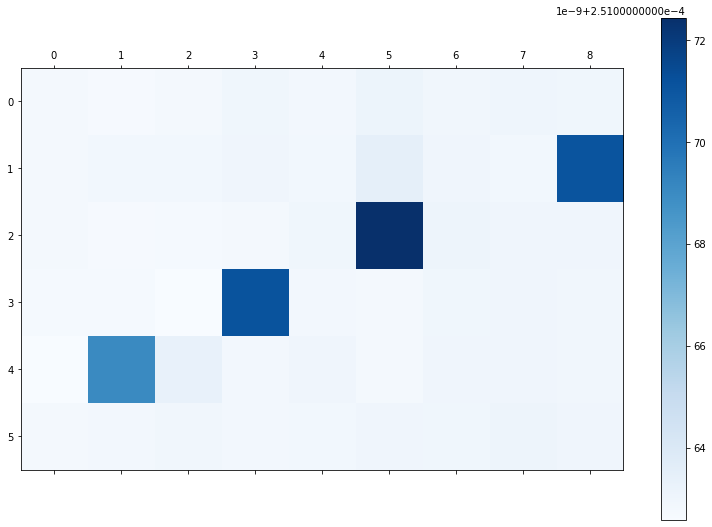

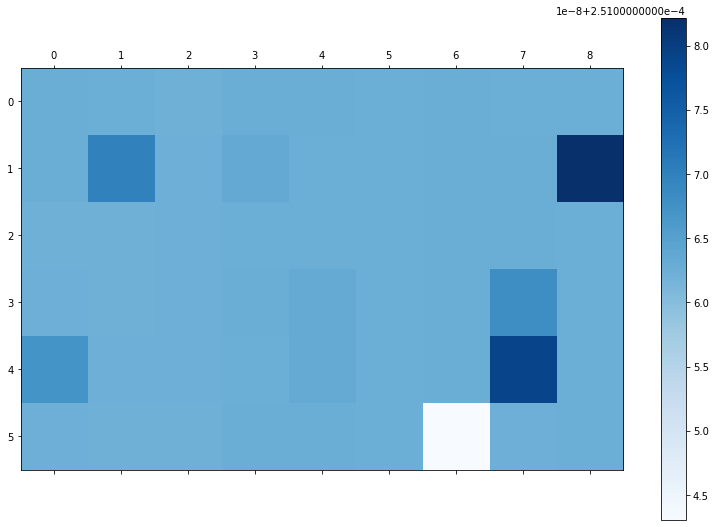

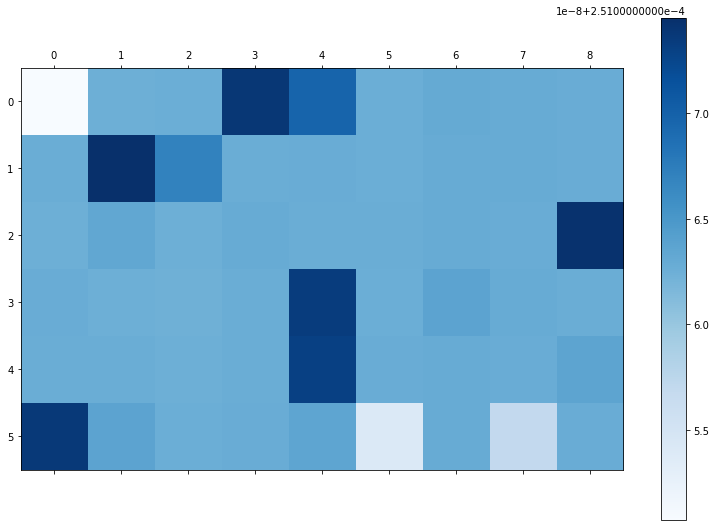

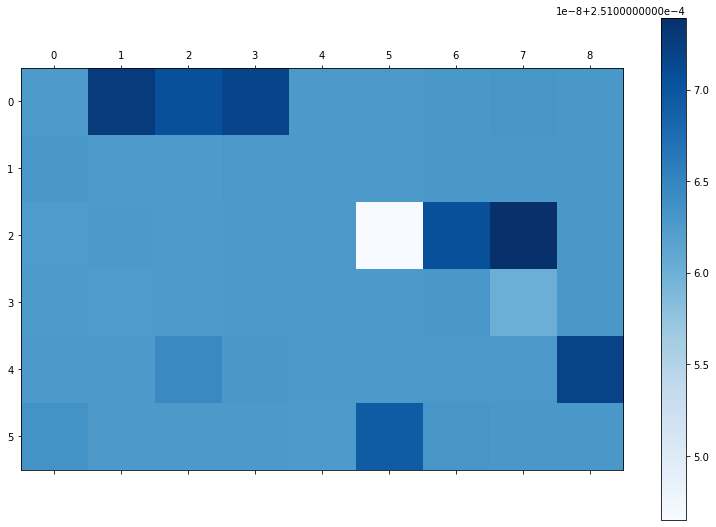

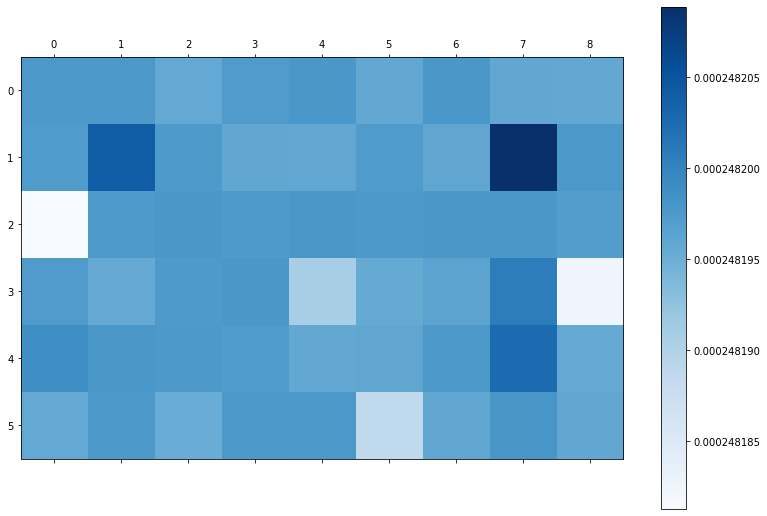

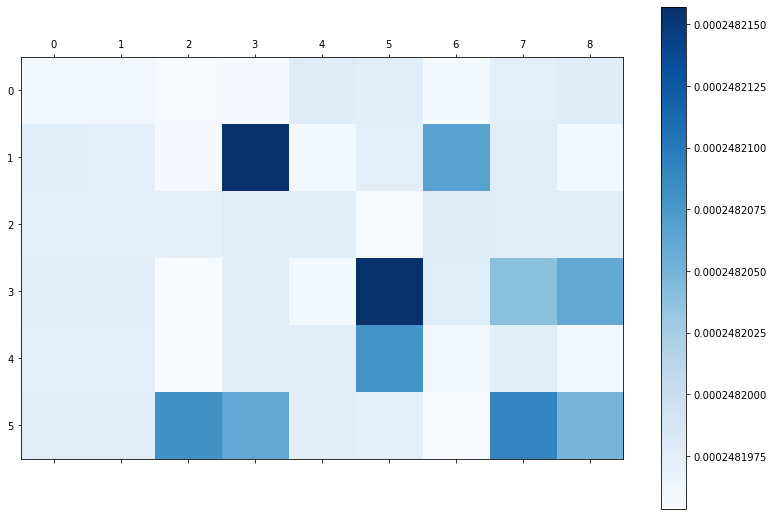

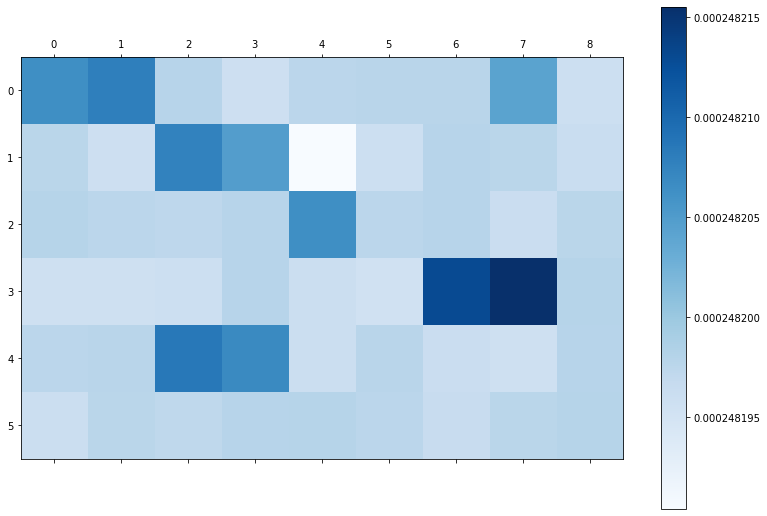

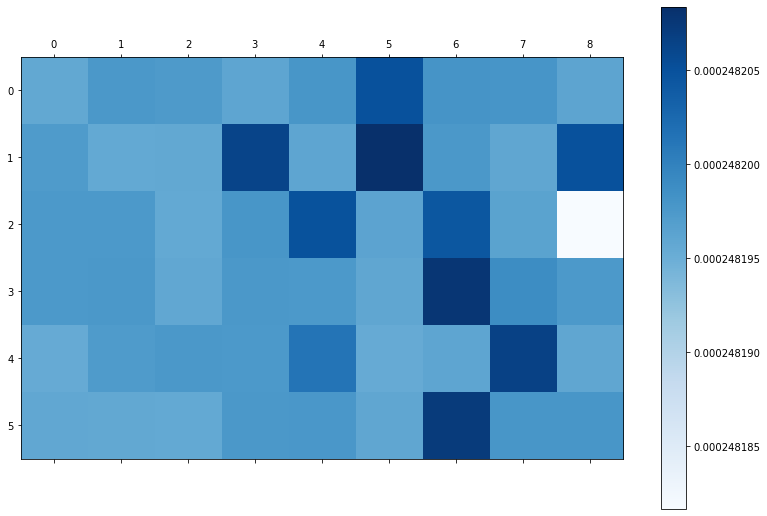

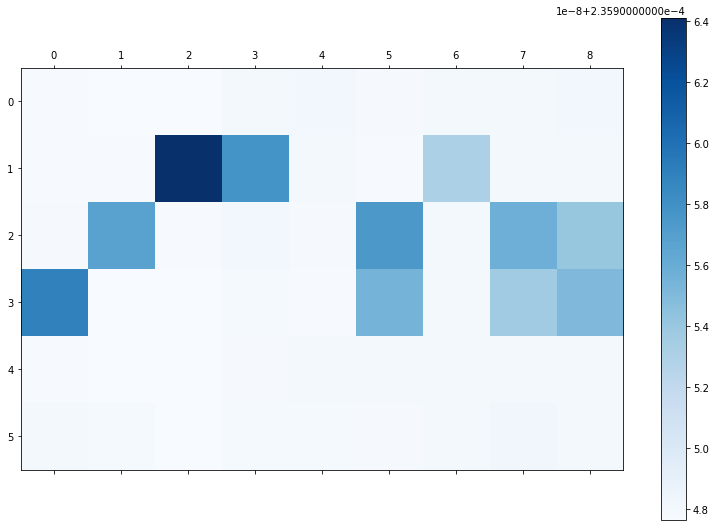

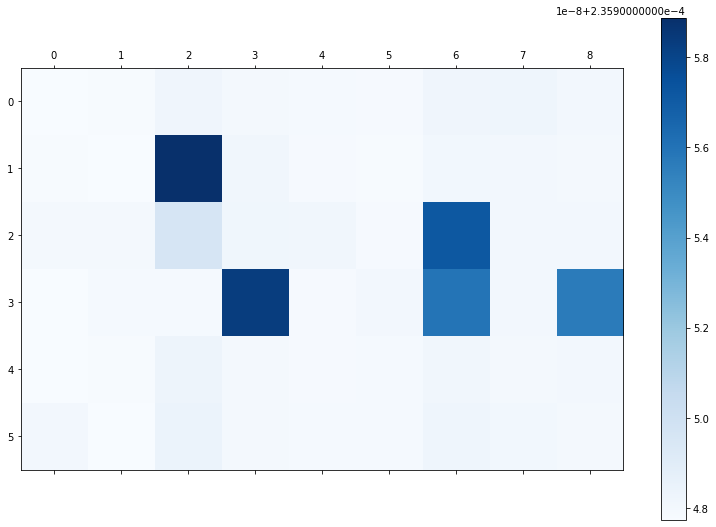

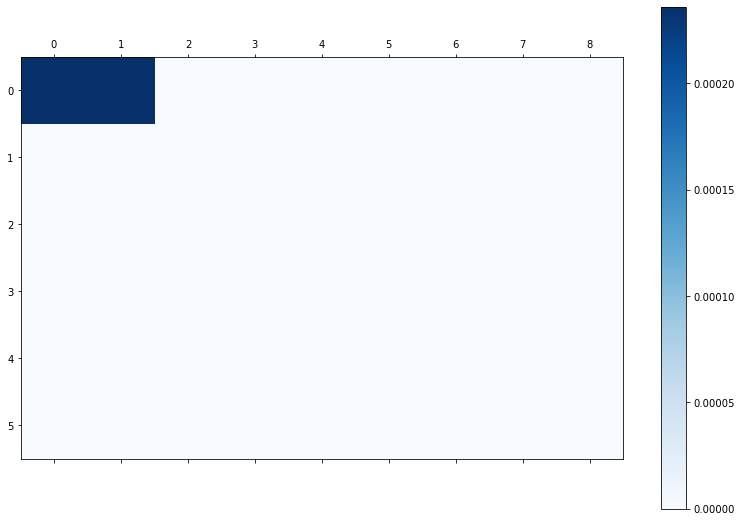

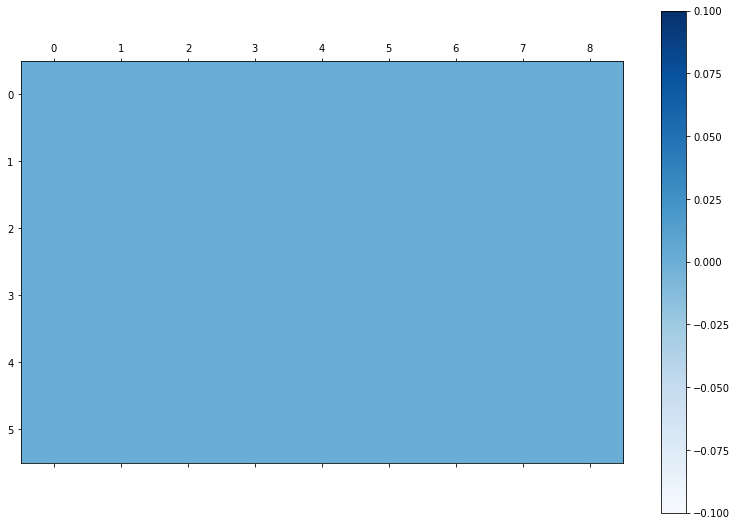

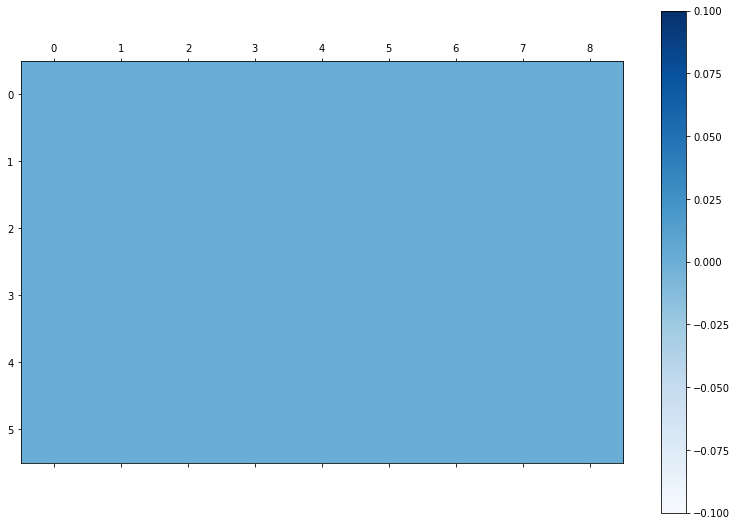

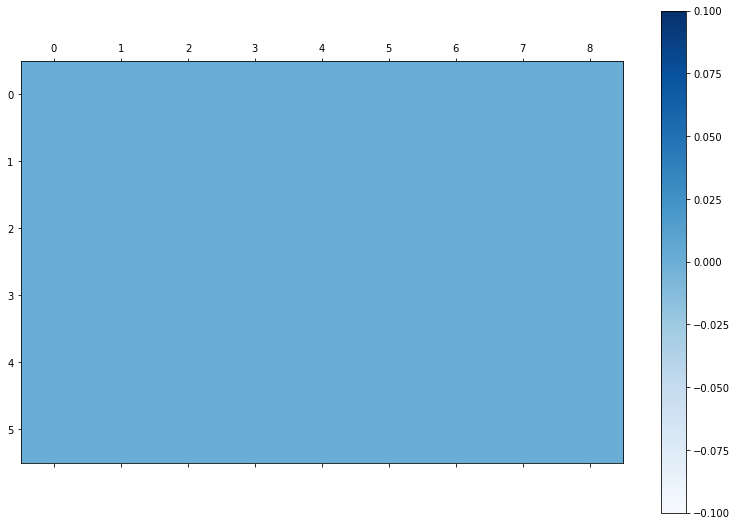

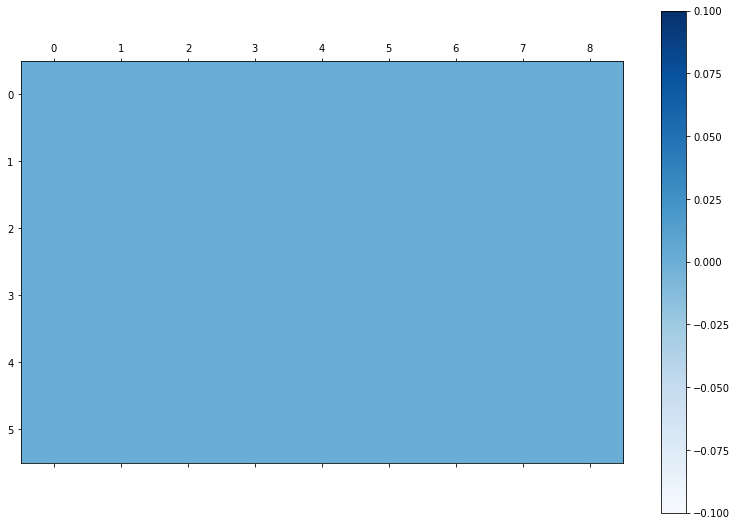

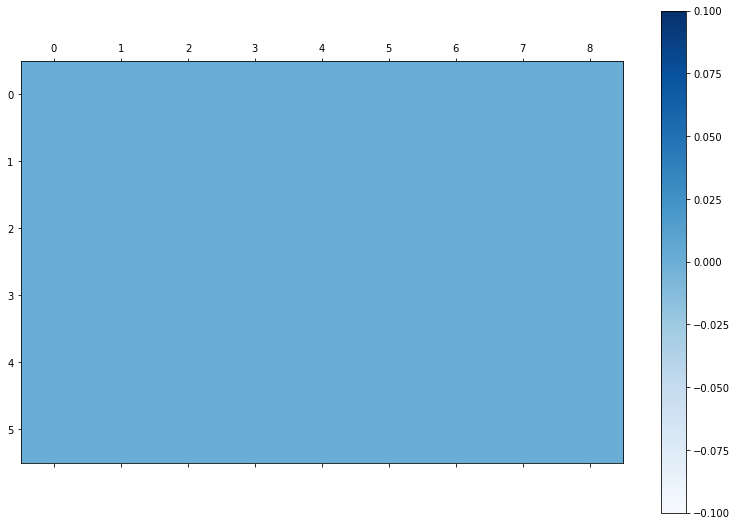

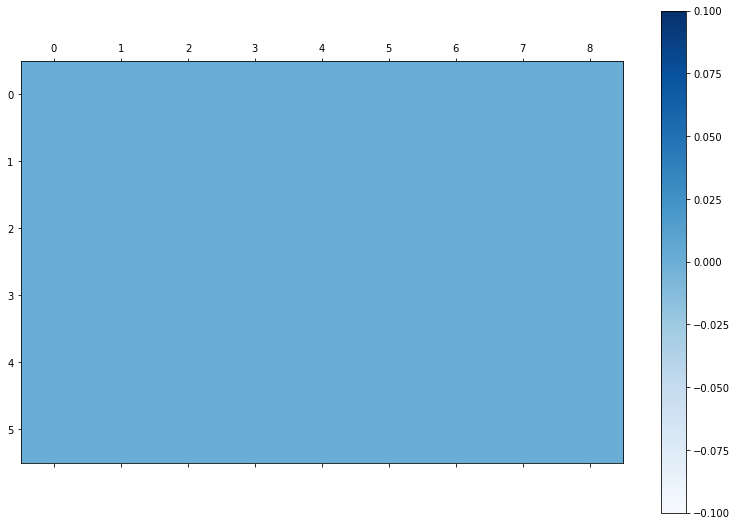

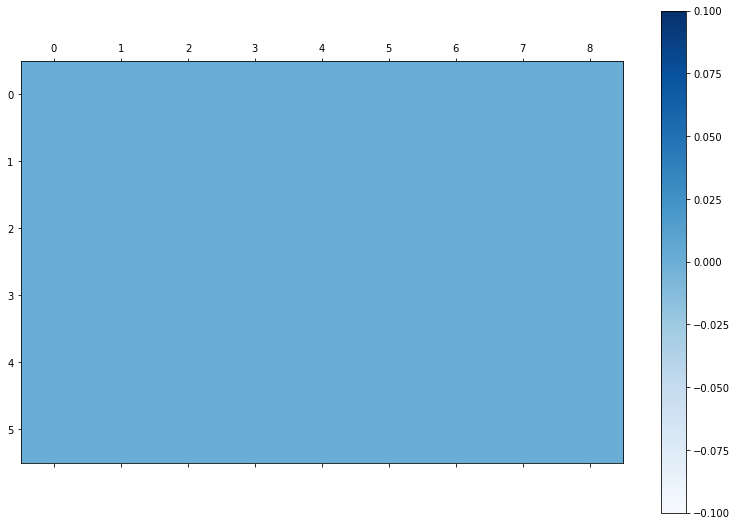

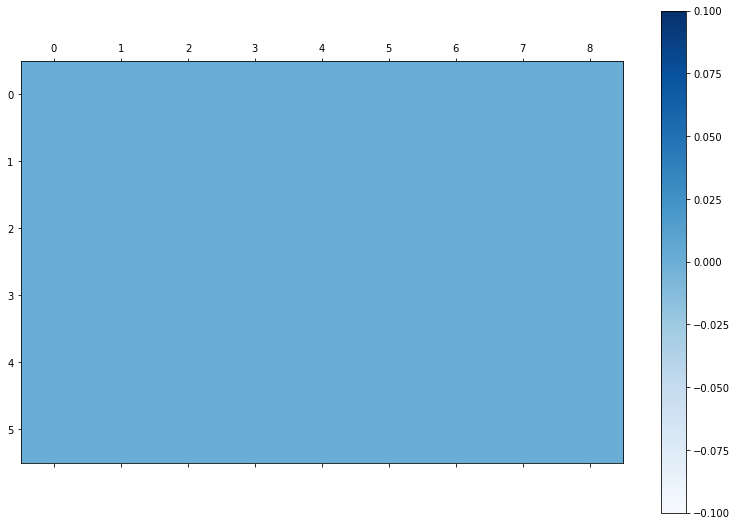

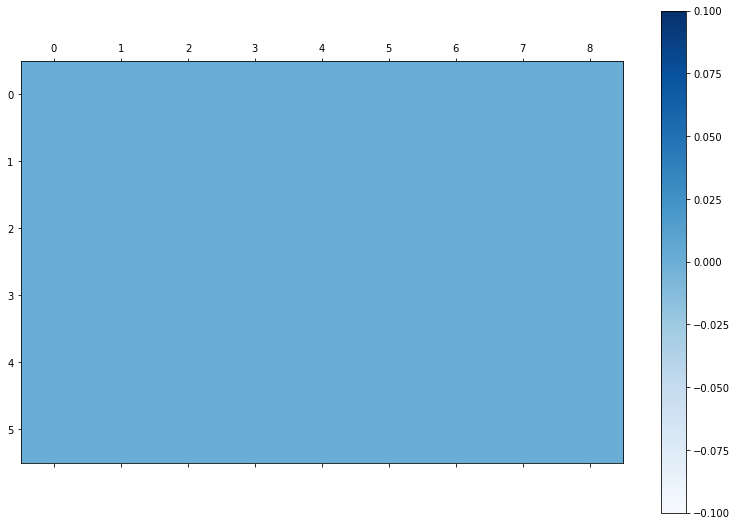

In [139]:
arr_std = np.zeros((24,6,9))
    
for calo in pd.unique(df['caloNum']):
    arr_std[calo-1] = timeStd[calo-1].reshape(6,9)

plt.rcParams["figure.figsize"] = (18,9) 

for calo in pd.unique(df['caloNum']):
    plt.matshow(arr_std[calo-1], cmap=plt.cm.Blues)
    plt.colorbar()


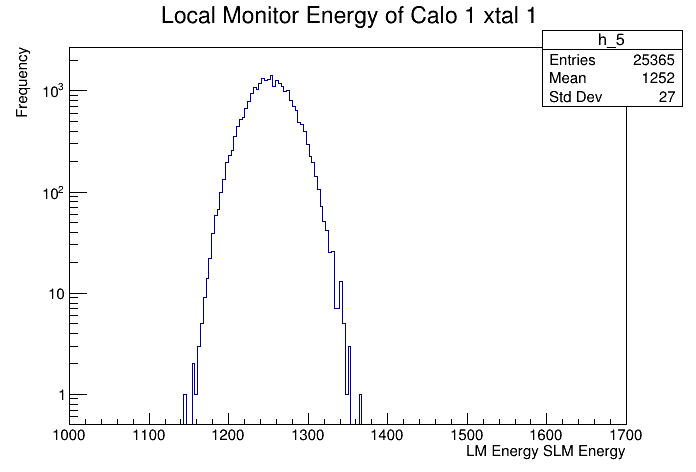

In [119]:
h5 = r.TH1D(f"h_{5}", "Local Monitor 1 Energy of Calo {} xtal {}; LM Energy; Frequency".format(calo,xtal), 200, 1000, 1700)

for y in fullRunPulse['lmPmtAmp1']:
    h5.Fill(y)

h5.Draw()
c.Draw()

In [ ]:
h6 = r.TH1D(f"h_{6}", "Local Monitor 2 Energy of Calo {} xtal {}; LM Energy; Frequency".format(calo,xtal), 200, 1000, 1700)

for y in fullRunPulse['lmPmtAmp2']:
    h6.Fill(y)

h6.Draw()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_6 (Potential memory leak).


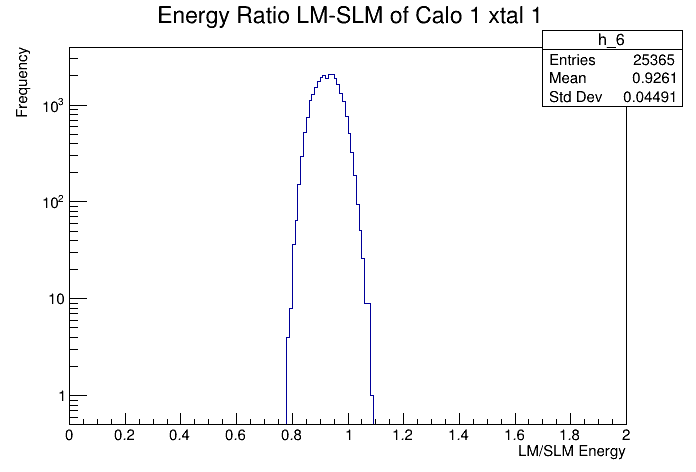

In [126]:
h7 = r.TH1D(f"h_{7}", "Energy Ratio LM1-SLM of Calo {} xtal {}; LM/SLM Energy; Frequency".format(calo,xtal), 200, 0, 2)

for y in fullRunPulse['lmPmtAmp1']/fullRunPulse['normalSlmEnergy']/mean_temp:
    h7.Fill(y)

h7.Draw()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_6 (Potential memory leak).


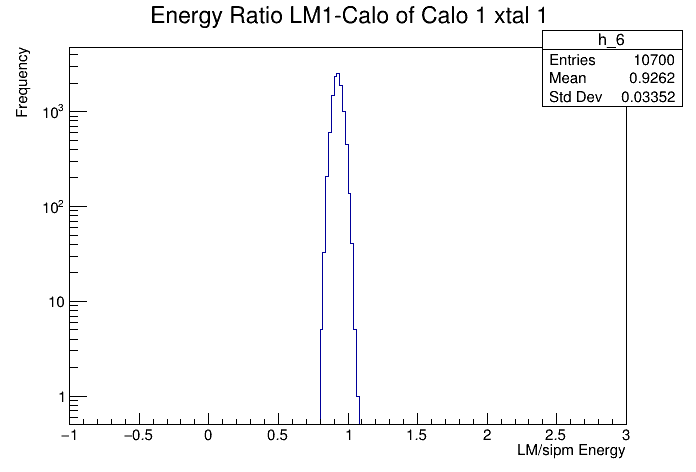

In [152]:
h8 = r.TH1D(f"h_{8}", "Energy Ratio LM1-Calo of Calo {} xtal {}; LM/sipm Energy; Frequency".format(calo,xtal), 200, -1, 3)

for y in fullRunPulse['lmPmtAmp1']/fullRunPulse['sipmEnergy']:
    h8.Fill(y)

h8.Draw()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_8 (Potential memory leak).


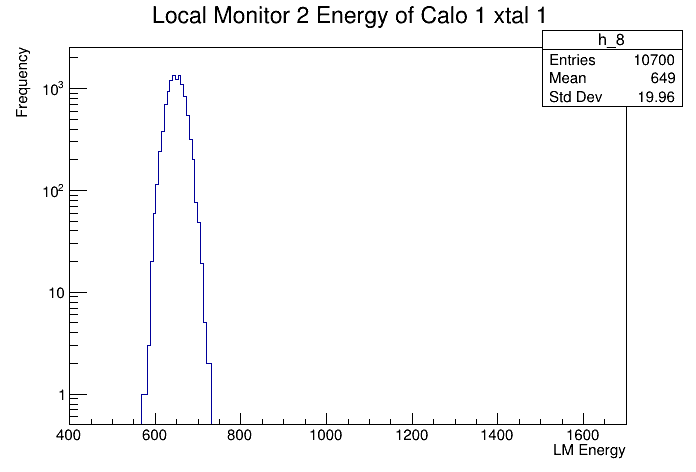

In [148]:
h8 = r.TH1D(f"h_{8}", "Local Monitor 2 Energy of Calo {} xtal {}; LM Energy; Frequency".format(calo,xtal), 200, 400, 1700)

for y in df_xtal['lmPmtAmp2']:
    h8.Fill(y)

h8.Draw()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_6 (Potential memory leak).


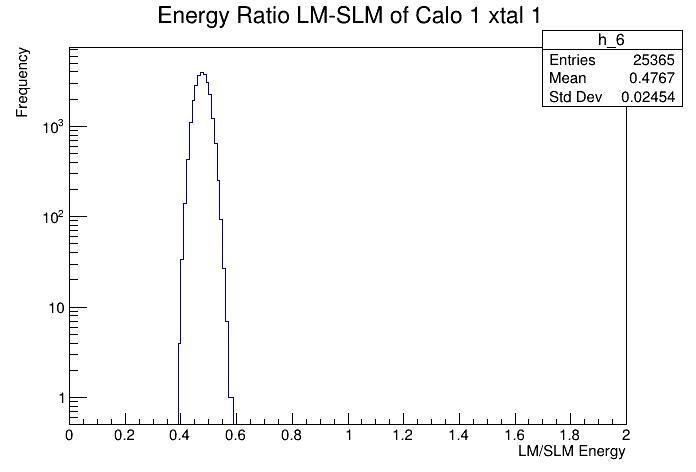

In [129]:
h9 = r.TH1D(f"h_{9}", "Energy Ratio LM2-SLM of Calo {} xtal {}; LM/SLM Energy; Frequency".format(calo,xtal), 200, 0, 2)

for y in fullRunPulse['lmPmtAmp2']/fullRunPulse['normalSlmEnergy']/mean:
    h9.Fill(y)

h9.Draw()
c.Draw()

Warning in <TDirectoryFile::Append>: Replacing existing TH1: h_6 (Potential memory leak).


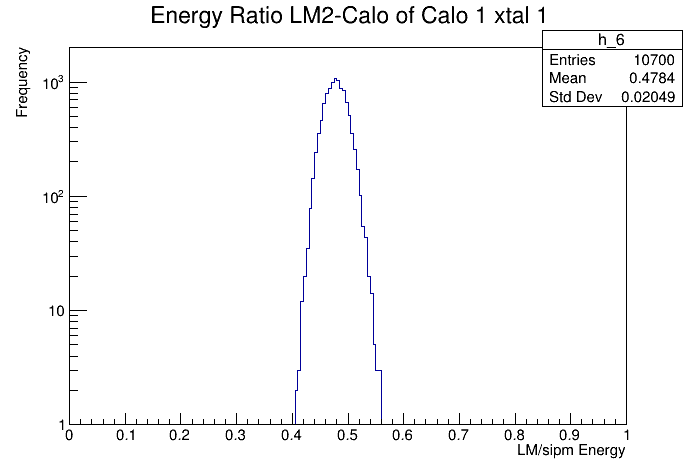

In [150]:
h10 = r.TH1D(f"h_{10}", "Energy Ratio LM2-Calo of Calo {} xtal {}; LM/sipm Energy; Frequency".format(calo,xtal), 200, 0, 1)

for y in fullRunPulse['lmPmtAmp2']/fullRunPulse['sipmEnergy']:
    h10.Fill(y)

h10.Draw()
c.Draw()